In [57]:
## Finding out the high paying skills for remote jobs in the country

import pandas as pd
import matplotlib.pyplot as plt
import ast

pd.set_option('display.max_columns', None)
pd.set_option('display.width', 1000)

file = "C:\\Users\\aksha\\data_analysis_job_market\\dataset\\data_jobs.csv"
df = pd.read_csv(file)

## data frame containing only jobs from the US and have work from home option

df_US_wfh = df[(df['job_country']=='United States') & (df['job_work_from_home']==True)].copy()
df_US_wfh.head()



,job_title_short,job_title,job_location,job_via,job_schedule_type,job_work_from_home,search_location,job_posted_date,job_no_degree_mention,job_health_insurance,job_country,salary_rate,salary_year_avg,salary_hour_avg,company_name,job_skills,job_type_skills
5,Data Engineer,GCP Data Engineer,Anywhere,via ZipRecruiter,Contractor and Temp work,True,Georgia,2023-11-07 14:01:59,False,False,United States,NaN,NaN,NaN,smart folks inc,"['python', 'sql', 'gcp']","{'cloud': ['gcp'], 'programming': ['python', '..."
9,Data Scientist,Data Scientist II,Anywhere,via ZipRecruiter,Full-time,True,"New York, United States",2023-04-23 13:02:57,False,False,United States,NaN,NaN,NaN,"Radwell International, LLC","['sql', 'python', 'r', 'mongodb', 'mongodb', '...","{'analyst_tools': ['excel'], 'cloud': ['azure'..."
51,Senior Data Engineer,Senior Data Engineer,Anywhere,via LinkedIn,Contractor,True,"Illinois, United States",2023-06-21 13:09:39,False,False,United States,hour,NaN,72.5,Aditi Consulting,"['python', 'java', 'aws', 'databricks', 'spark']","{'cloud': ['aws', 'databricks'], 'libraries': ..."
73,Data Analyst,Entry level / Systems Data Analyst (Remote),Anywhere,via LinkedIn,Contractor,True,"Illinois, United States",2023-06-16 13:18:22,True,True,United States,NaN,NaN,NaN,Soft Magic,"['word', 'excel', 'powerpoint', 'outlook']","{'analyst_tools': ['word', 'excel', 'powerpoin..."
92,Data Engineer,Remote - Data Engineer - Permanent - W2,Anywhere,via LinkedIn,Full-time,True,"Illinois, United States",2023-02-21 13:29:59,False,True,United States,year,120000.0,NaN,Apex Systems,"['sql', 'python']","{'programming': ['sql', 'python']}"


In [58]:
type(df_US_wfh.loc[5,'job_skills'])

## job skills is  a string instead of a list so I need to convert the string into a list

def converter(skill):

    if pd.isna(skill):
        return []
    else :
        return ast.literal_eval(skill)


df_US_wfh['job_skills'] = df_US_wfh['job_skills'].apply(converter)




In [59]:
type(df_US_wfh.loc[5,'job_skills'])

list

In [60]:
## data is ready to be accessed and analysed
## get skills corresponding to high pay : first explode the skills , you will get one row per skill the grop by skilland sort by salary

df_exploded = df_US_wfh.explode('job_skills')
df_skills = df_exploded.groupby(['job_skills'])
df_skills = df_skills[['job_skills']].value_counts().sort_values(ascending = False)
df_skills


job_skills
sql        14449
python     13591
aws         5817
tableau     5122
r           5070
           ...  
lisp           1
symfony        1
unreal         1
xamarin        1
wsl            1
Name: count, Length: 221, dtype: int64

<Axes: xlabel='job_skills'>

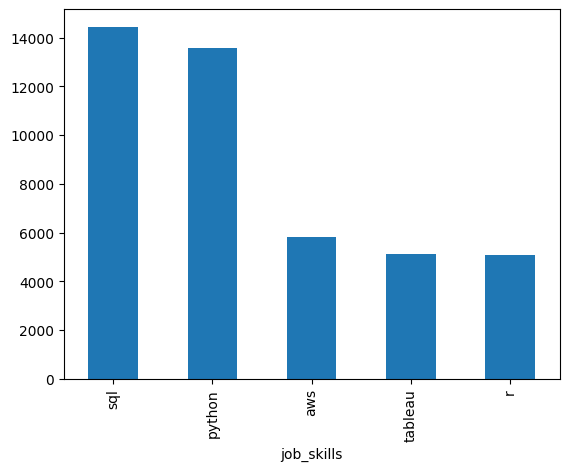

In [61]:
top_skills = df_skills.head(5).index.to_list()
df_skills_to_plot = df_skills[top_skills]
df_skills_to_plot.plot(kind='bar')